<a href="https://colab.research.google.com/github/joaovictor-loureiro/data-science/blob/master/case-tecnico-ciencia-de-dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Importando o dataset
df = pd.read_csv('https://raw.githubusercontent.com/joaovictor-loureiro/data-science/master/data-science/datasets/heart.csv')

In [3]:
# Ver as primeiras entradas
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 1) O que você entendeu do dataset?

Basicamente, é um dataset sobre dados da sua saúde, e vai indicar quais são as chances de você ter um infarto.

# 2) Catálogo de informações.

* `age` - Idade da pessoa
* `sex` - Sexo da pessoa
* `cp` - Tipo de dor no peito (possui 4 níveis)
* `trestbps` - Pressão arterial da pessoa, quando está em repouso
* `chol` - Nível de colesterol sérico da pessoa
* `fbs` - Nível de açúcar no sangue da pessoa, em jejum
* `restecg` - Resultado de exames eletrocardiográficos da pessoa, em repouso
* `thalach` - Máximo de frequência cardíaca alcançado
* `exang` - Se a pessoa possui angina (dor no peito) induzida por exercíco
* `oldpeak`- Depressão do segmento ST induzido por exercício
* `slope` - Inclinação do segmento ST induzido no pico de exercício
* `ca` - Número de vasos coloridos por fluoroscopia
* `thal` - Normal / Defeito corrigido / Defeito reversível
* `target` - Representa se a pessoa possui ou não chances de ter um ataque cardíaco. 0 (não) e 1 (sim).


# 3) Precisa tratar/normalizar algum dado?



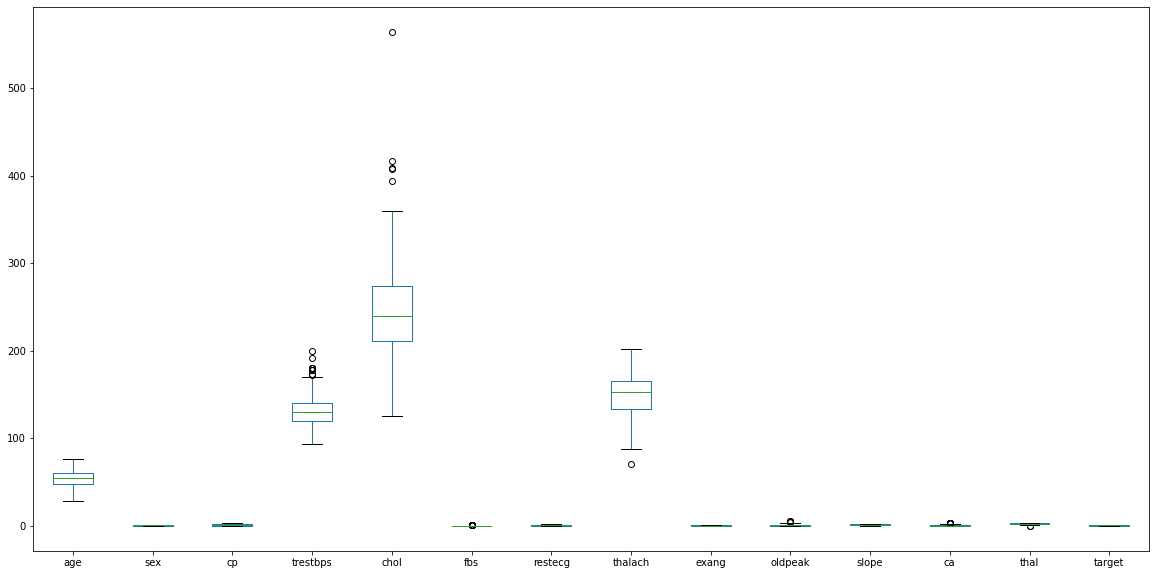

In [10]:
# Plotando um Boxplot
df.plot(kind='box', figsize=(20, 10))

plt.show()

Olhando o boxplot acima, eu diria que alguns dados precisariam ser tratados, já que possuem outliers. Porém, como não tenho conhecimento suficiente para chegar a conclusão se devo ou não trata-los, optarei por manter a integridade original do dataset.

# 4) Tente ordenar as features por relevância.

Acredito que esta seria uma ordem de relevância do dataset:

In [16]:
df = df[['trestbps', 'cp', 'restecg', 'exang', 'age', 'chol', 'fbs', 'oldpeak', 'slope', 'thalach', 'ca', 'thal', 'sex', 'target']]
df.head()

,trestbps,cp,restecg,exang,age,chol,fbs,oldpeak,slope,thalach,ca,thal,sex,target
0,145,3,0,0,63,233,1,2.3,0,150,0,1,1,1
1,130,2,1,0,37,250,0,3.5,0,187,0,2,1,1
2,130,1,0,0,41,204,0,1.4,2,172,0,2,0,1
3,120,1,1,0,56,236,0,0.8,2,178,0,2,1,1
4,120,0,1,1,57,354,0,0.6,2,163,0,2,0,1


# 5) Tente clusterizar os dados.

In [17]:
# Importar o modelo
from sklearn.cluster import KMeans

In [28]:
# Instanciar o modelo e definir hyperparameters
model = KMeans(n_clusters=3)

In [29]:
# Separar os dados
X = df[['trestbps', 'age']]

In [30]:
# Treinar o modelo
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
# Fazer previsões em cima de novos dados
y_pred = model.predict(X)

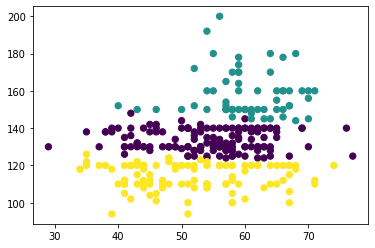

In [32]:
# Gráfico de Dispersão do Modelo Clusterizado
plt.scatter('age', 'trestbps', data=df, c=y_pred, s=40, cmap='viridis')
plt.show()

# 6) Tente predizer a chance de ocorrer um infarto.

Irei utilizar um modelo de Regressão Logística para tentar a predição.

In [33]:
# Importar o Sckit-learn para criação do modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [34]:
# Importando o modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression

In [35]:
# Instanciar o modelo
model = LogisticRegression()

In [37]:
# Criar uma feature matrix e um target vector
X = df.drop('target', axis=1)
y = df['target']

In [39]:
# Dividir os dados do dataset entre dados de treino e dados de teste para o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
# Padronizar os dados para treinar o modelo
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [41]:
# Treinar o modelo
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
# Fazer previsões em cima dos dados de teste
X_test = scaler.transform(X_test) # Padronizar os dados de teste
y_pred = model.predict(X_test)

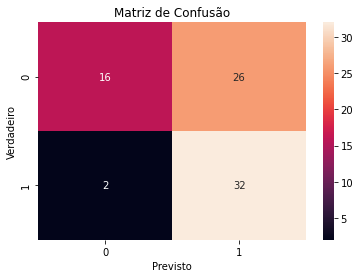

In [48]:
# Matriz de confusão
ig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

In [45]:
# Relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.38      0.53        42
           1       0.55      0.94      0.70        34

    accuracy                           0.63        76
   macro avg       0.72      0.66      0.61        76
weighted avg       0.74      0.63      0.61        76



Sendo assim, o modelo para predição de infarto mostrado acima, possui uma **acurácia de 63%**.